## 🌍 World Happiness Report EDA (2011-2024)
# This project explores the World Happiness Report dataset, analyzing global happiness trends and the contributing factors that influence happiness scores over time.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.impute import SimpleImputer

In [2]:
# Set aesthetic parameters for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# STEP 2: Load the dataset
file_path = 'world_happiness_data.xlsx'  
df = pd.read_excel(file_path, engine='openpyxl')

## Knowing the data

In [ ]:
# STEP 3: Initial Data Assessment
def initial_assessment(df):
    print("First 5 rows:")
    print(df.head())
    
    print("\nDataset shape:", df.shape)
    
    print("\nData types and missing values:")
    print(df.info())
    
    print("\nDescriptive statistics:")
    print(df.describe(include='all'))
    
    print("\nDuplicate rows:", df.duplicated().sum())

initial_assessment(df)


First 5 rows:
   year  rank country_name  ladder_score  upperwhisker  lowerwhisker  \
0  2024     1      Finland         7.736         7.810         7.662   
1  2023   143  Afghanistan         1.721         1.775         1.667   
2  2022   137  Afghanistan         1.859         1.923         1.795   
3  2021   146  Afghanistan         2.404         2.469         2.339   
4  2020   150  Afghanistan         2.523         2.596         2.449   

   explained_by:_log_gdp_per_capita  explained_by:_social_support  \
0                             1.749                         1.783   
1                             0.628                         0.000   
2                             0.645                         0.000   
3                             0.758                         0.000   
4                             0.370                         0.000   

   explained_by:_healthy_life_expectancy  \
0                                  0.824   
1                                  0.242   
2     

### Let's get an automated report of our dataset!!

In [5]:
# STEP 4: Automated EDA Report (Sweetviz)
report = sv.analyze(df)
report.show_html('World_Happiness_EDA_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report World_Happiness_EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Finding the missing values from the dataset

In [62]:
from sklearn.impute import SimpleImputer

def handle_missing_data(df):
    # Print missing value counts
    missing_counts = df.isnull().sum()
    total_missing = missing_counts[missing_counts > 0]
    if not total_missing.empty:
        print("🧪 Missing Values Detected:\n")
        print(total_missing)
    else:
        print("No missing values found.")

    # Impute numeric columns with median
    num_cols = df.select_dtypes(include=np.number).columns
    imputer = SimpleImputer(strategy='median')
    df[num_cols] = imputer.fit_transform(df[num_cols])

    # Impute categorical columns with 'Unknown'
    cat_cols = df.select_dtypes(exclude=np.number).columns
    df[cat_cols] = df[cat_cols].fillna('Unknown')

    print("\nMissing values summary:")
    print(df.isnull().sum())

    return df

df = handle_missing_data(df)


No missing values found.

Missing values summary:
year                                          0
rank                                          0
country_name                                  0
ladder_score                                  0
upperwhisker                                  0
lowerwhisker                                  0
explained_by:_log_gdp_per_capita              0
explained_by:_social_support                  0
explained_by:_healthy_life_expectancy         0
explained_by:_freedom_to_make_life_choices    0
explained_by:_generosity                      0
explained_by:_perceptions_of_corruption       0
dystopia_+_residual                           0
dtype: int64


### Removing the duplicates

In [ ]:
def clean_data(df):
    # Clean column names
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    
    
    # Remove duplicates
    df = df.drop_duplicates()
    
    return df

df = clean_data(df)

## Univariate Analysis

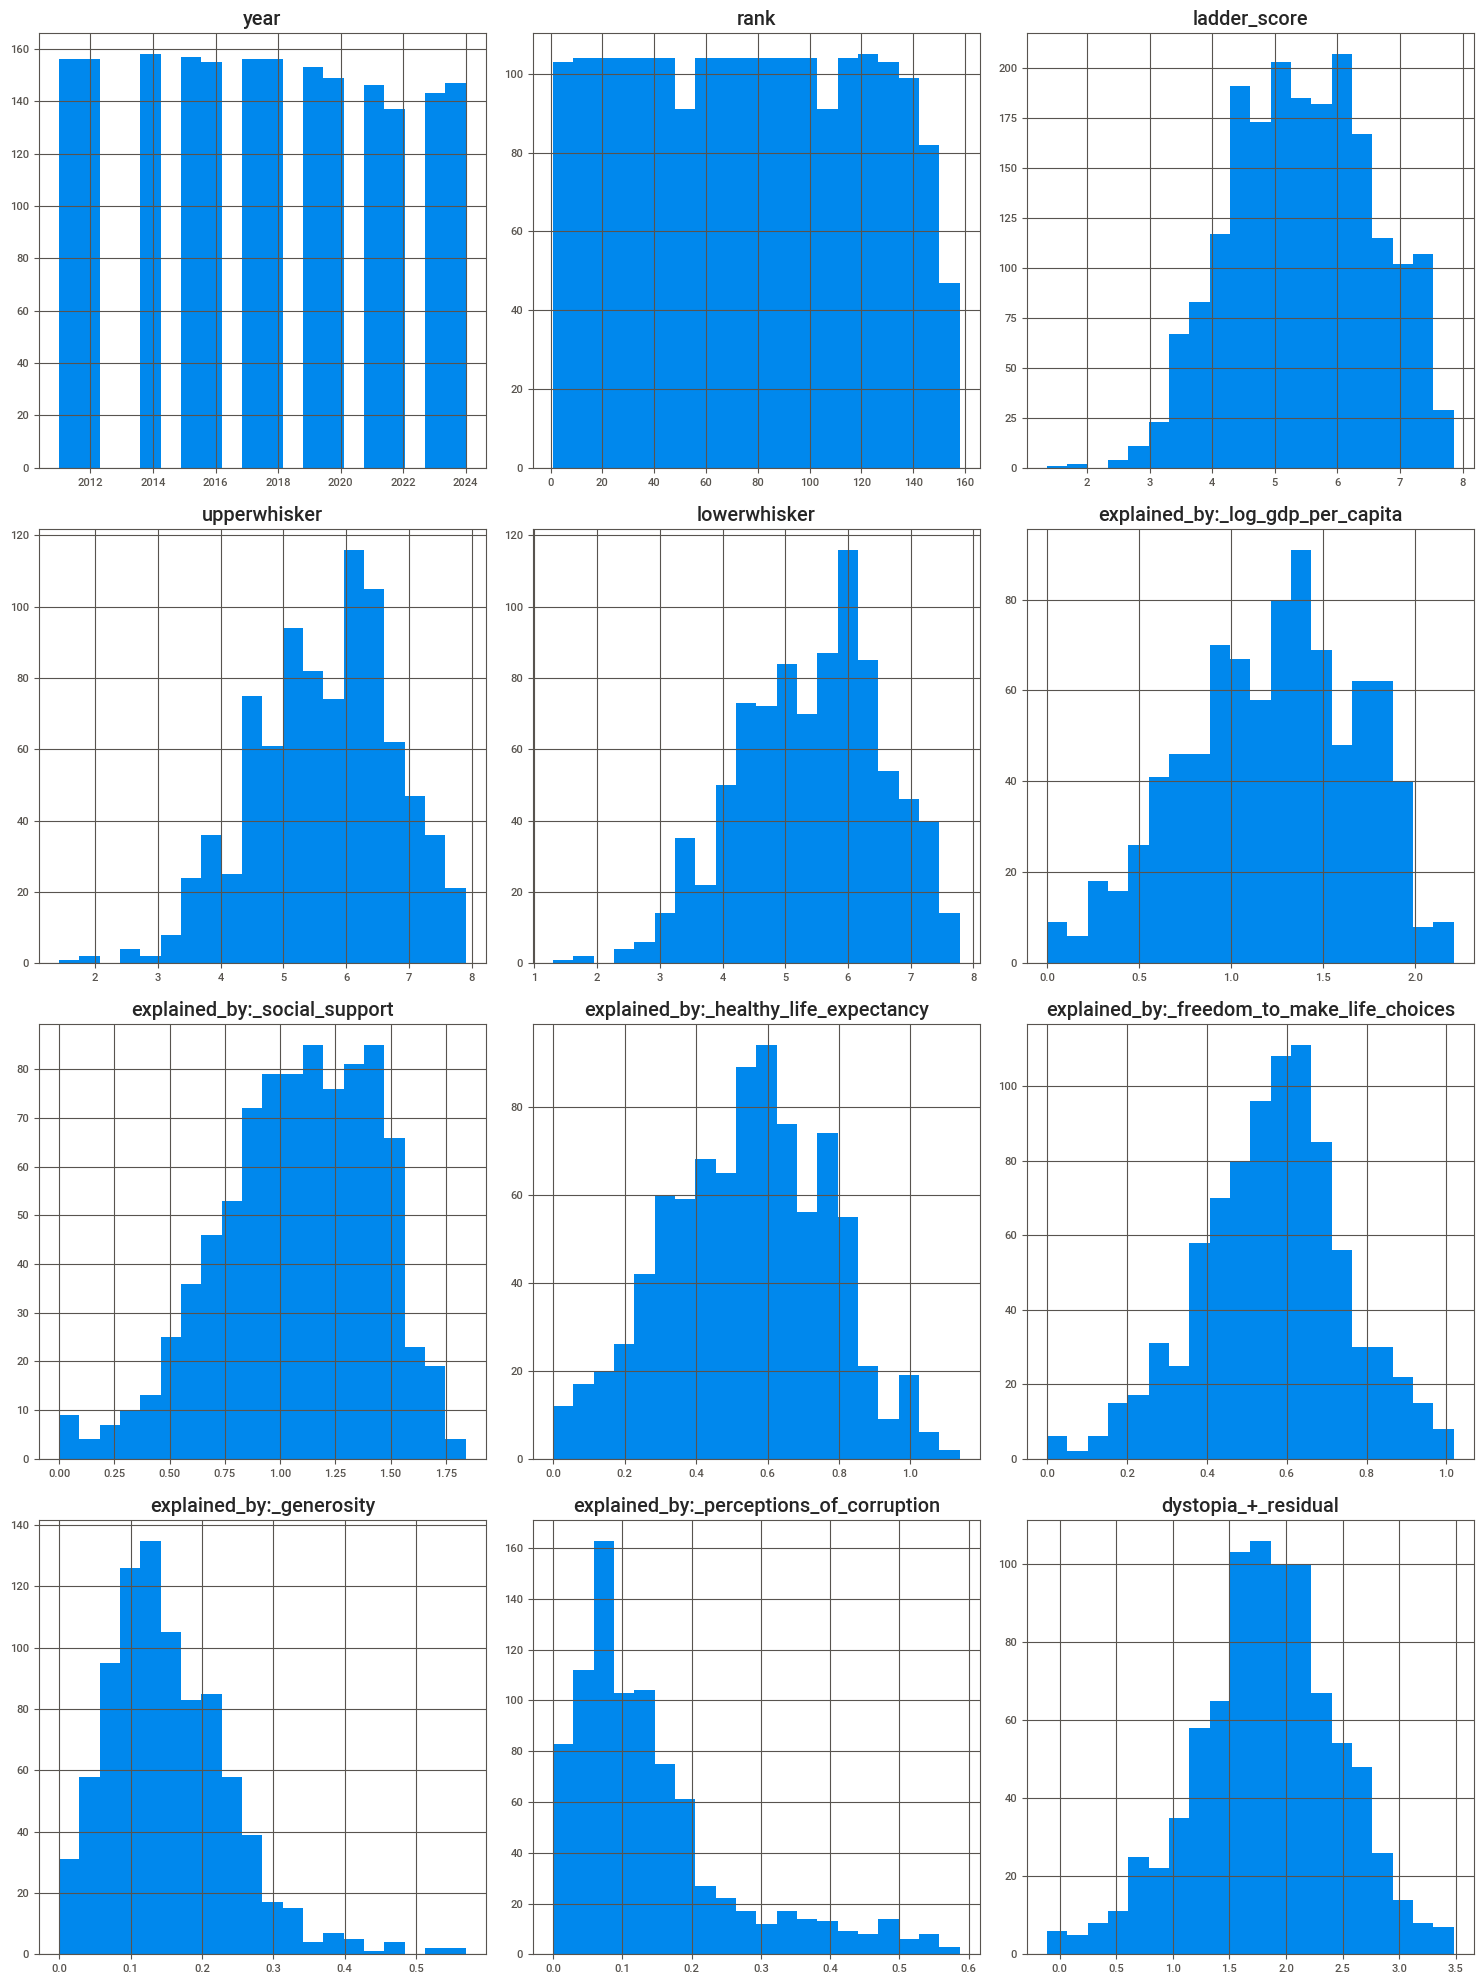

In [ ]:
import math

def univariate_analysis(df):
    # Automated histogram plots for numerical variables
    num_cols = df.select_dtypes(include=np.number).columns
    n = len(num_cols)
    if n > 0:
        rows = math.ceil(n / 3)
        df[num_cols].hist(bins=20, layout=(rows, 3), figsize=(15, 5 * rows))
        plt.tight_layout()
        plt.show()
    
univariate_analysis(df)


## Multivariate Analysis, visualized by correlation heatmap

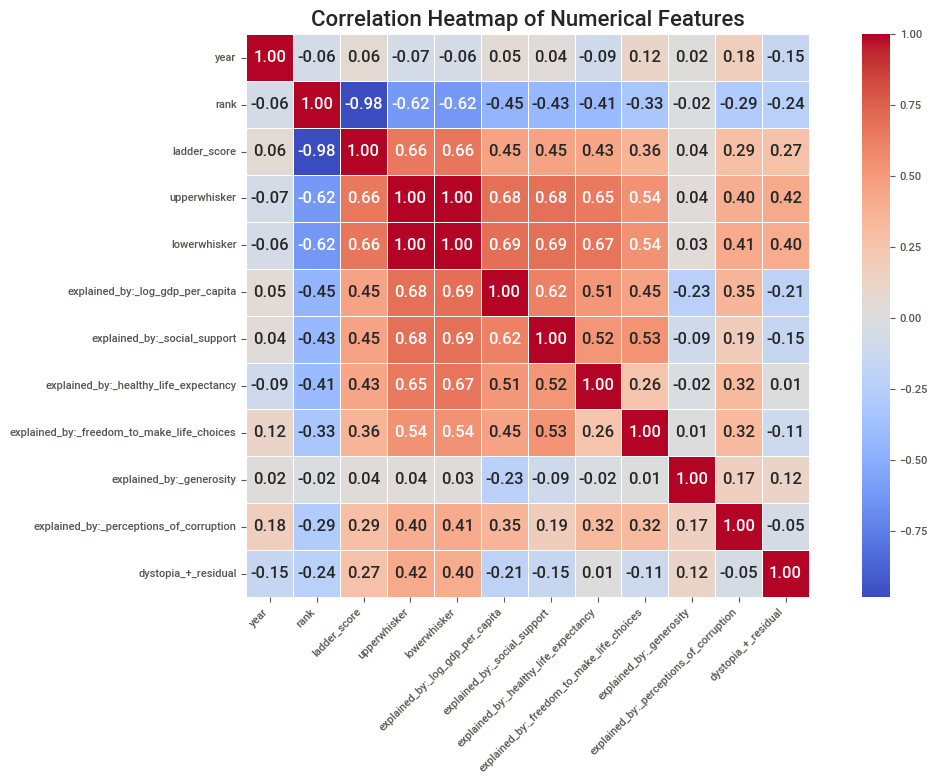


Correlation with Happiness Score:
ladder_score                                  1.000000
lowerwhisker                                  0.659088
upperwhisker                                  0.657533
explained_by:_log_gdp_per_capita              0.452785
explained_by:_social_support                  0.451550
explained_by:_healthy_life_expectancy         0.434303
explained_by:_freedom_to_make_life_choices    0.358225
explained_by:_perceptions_of_corruption       0.294396
dystopia_+_residual                           0.273737
year                                          0.057769
explained_by:_generosity                      0.036899
rank                                         -0.984097
Name: ladder_score, dtype: float64


In [ ]:
def multivariate_analysis(df):
    # --- Correlation Heatmap ---
    corr_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
    plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # --- Top Correlated Features with Happiness Score ---
    if 'happiness_score' in df.columns:
        target_corr = corr_matrix['happiness_score'].sort_values(ascending=False)
        target_corr = target_corr.drop('happiness_score')  # drop self-correlation
        plt.figure(figsize=(10, 6))
        sns.barplot(x=target_corr.values, y=target_corr.index, palette='viridis')
        plt.title('Correlation of Features with Happiness Score', fontsize=14)
        plt.xlabel('Correlation Coefficient')
        plt.tight_layout()
        plt.show()

        print("\nCorrelation with Happiness Score:")
        print(target_corr)

    # Top correlations with target variable 
    if 'ladder_score' in df.columns:
        target_corr = corr_matrix['ladder_score'].sort_values(ascending=False)
        print("\nCorrelation with Happiness Score:")
        print(target_corr)

multivariate_analysis(df)


## Outlier detection
Box plot visualization to know the presence of outliers in the dataset, for each attributes.

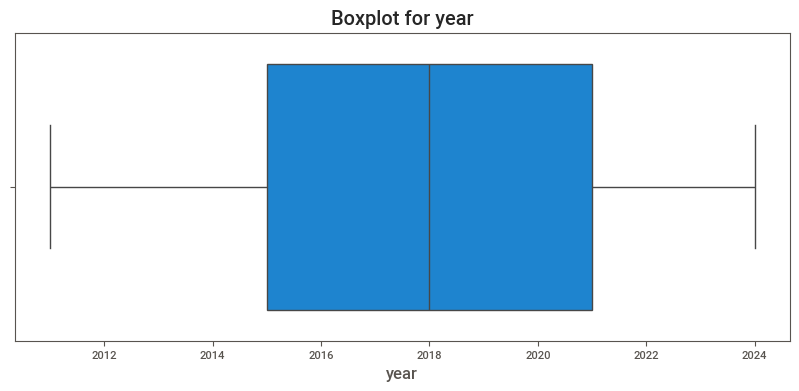


Outliers in year: 0


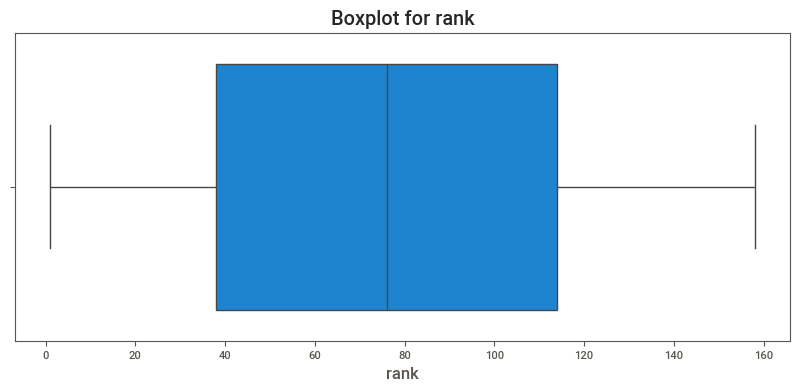


Outliers in rank: 0


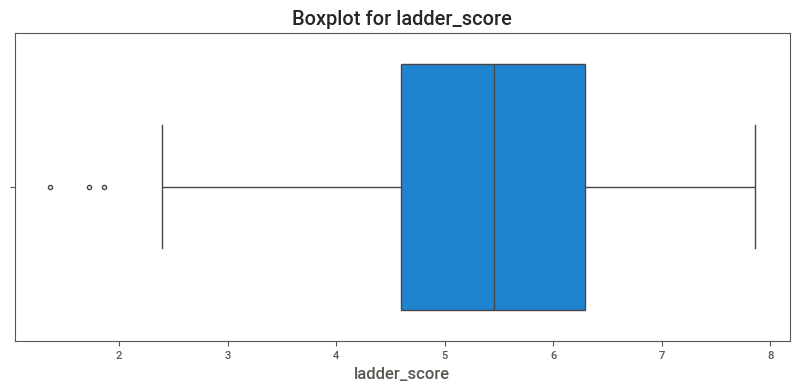


Outliers in ladder_score: 3


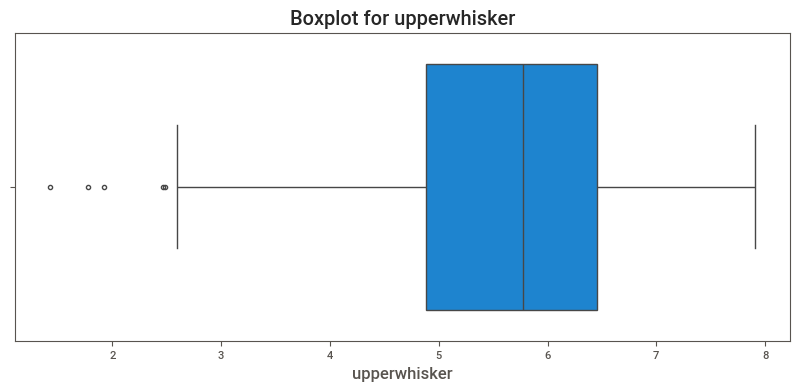


Outliers in upperwhisker: 5


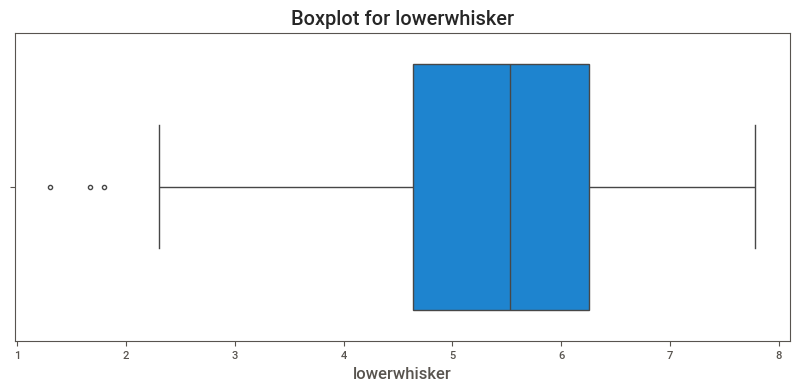


Outliers in lowerwhisker: 3


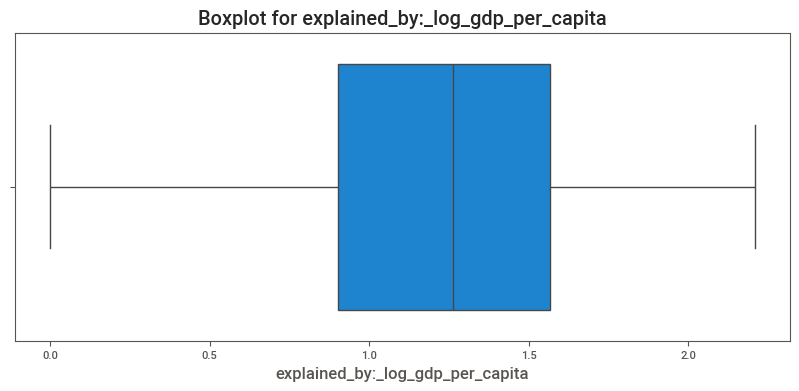


Outliers in explained_by:_log_gdp_per_capita: 0


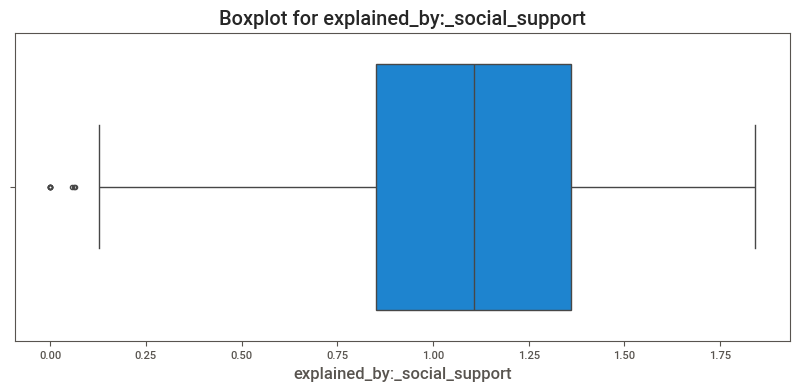


Outliers in explained_by:_social_support: 9


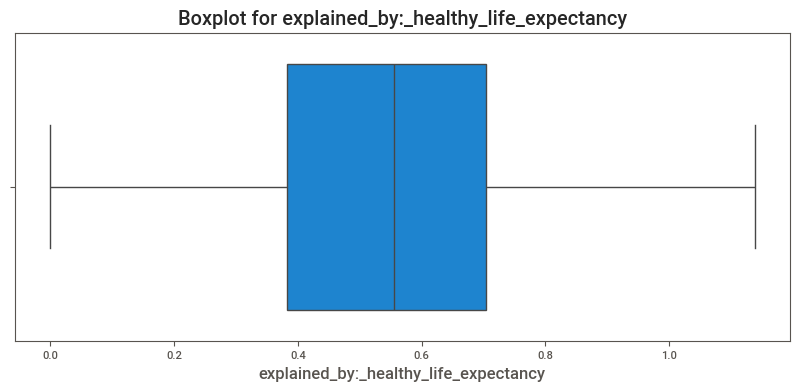


Outliers in explained_by:_healthy_life_expectancy: 0


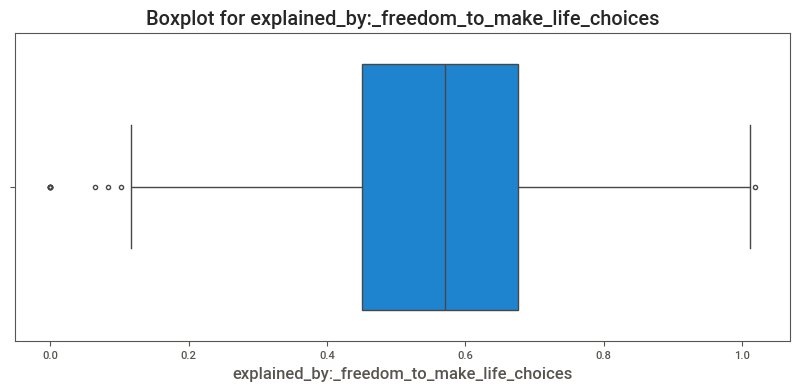


Outliers in explained_by:_freedom_to_make_life_choices: 10


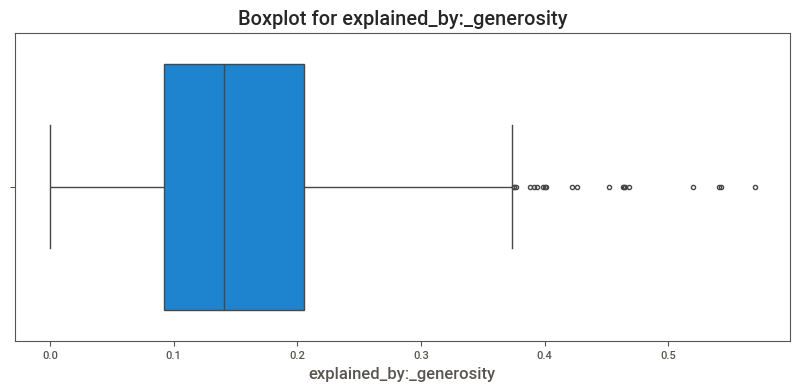


Outliers in explained_by:_generosity: 20


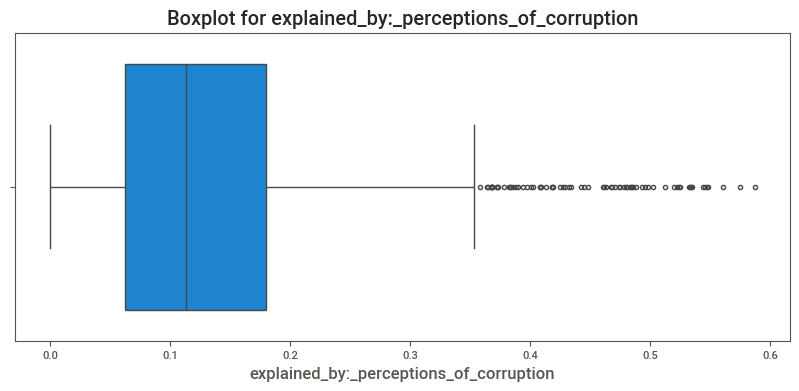


Outliers in explained_by:_perceptions_of_corruption: 74


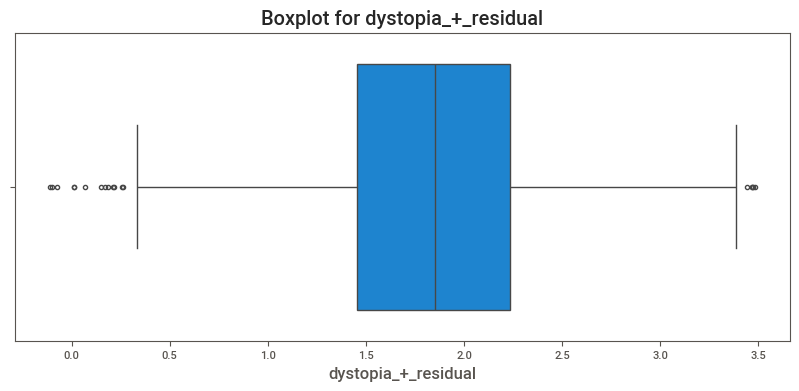


Outliers in dystopia_+_residual: 18


In [9]:
# STEP 9: Outlier Detection Automation
def detect_outliers(df):
    num_cols = df.select_dtypes(include=np.number).columns
    for col in num_cols:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot for {col}')
        plt.show()
        
        # Calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\nOutliers in {col}: {len(outliers)}")

detect_outliers(df)

## The TOP 10 happiest Countries

In [41]:
def top_bottom_countries(year, top=True, n=10):
    sorted_df = df[df['year'] == year].sort_values(by='ladder_score', ascending=not top)
    return sorted_df[['country_name', 'ladder_score']].head(n)

top_bottom_countries(2024, top=True)

,country_name,ladder_score
0,Finland,7.736
13,Denmark,7.521
26,Iceland,7.515
45,Sweden,7.345
58,Netherlands,7.306
71,Costa Rica,7.274
84,Norway,7.262
97,Israel,7.234
109,Luxembourg,7.122
122,Mexico,6.979


### Saving the cleaned dataset in a .csv file

In [64]:
# STEP 11: Save Cleaned Data and Report
df.to_csv('cleaned_world_happiness.csv', index=False)
print("\nEDA process completed. Check saved files:")
print("- cleaned_world_happiness.csv")


EDA process completed. Check saved files:
- cleaned_world_happiness.csv


## Distribution of the happiness Score

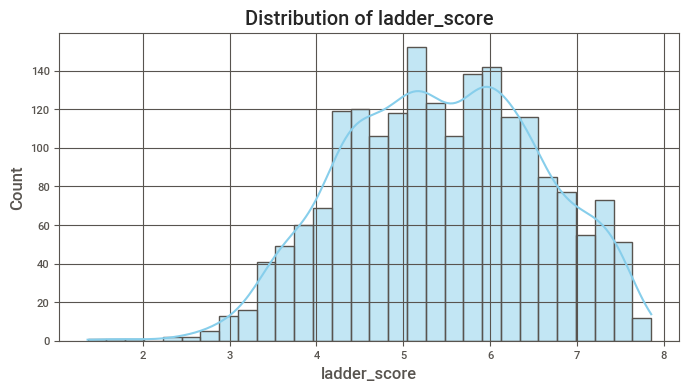

In [31]:
def plot_distribution(col, bins=30):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=bins, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.grid(True)
    plt.show()

# Example usage:
plot_distribution('ladder_score')


Scores of 5 and 6 are more prevalent, indicating a higher level of satisfaction or well-being (if the ladder score relates to such contexts).
A lower count in extreme values (near 2 and 8) could indicate fewer individuals experiencing very low or very high scores.


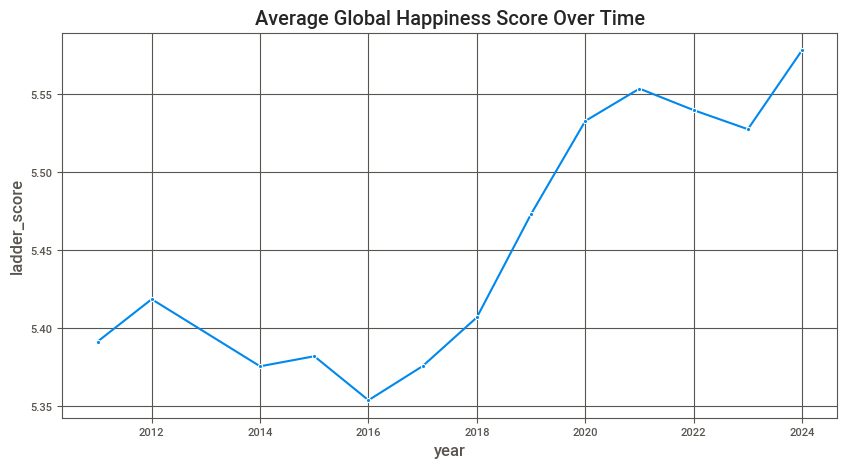

In [34]:
avg_happiness = df.groupby("year")["ladder_score"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_happiness, x='year', y='ladder_score', marker='o')
plt.title("Average Global Happiness Score Over Time")
plt.grid(True)
plt.show()


The graph indicates a fluctuating happiness score from 2012 to 2018, with a significant increase starting in 2019, peaking in 2024, after a slight decrease in 2023.

At the end, the average global happiness has improved steadily in recent years, suggesting a positive outlook on well-being.

### Comparison of happiness score between Countries

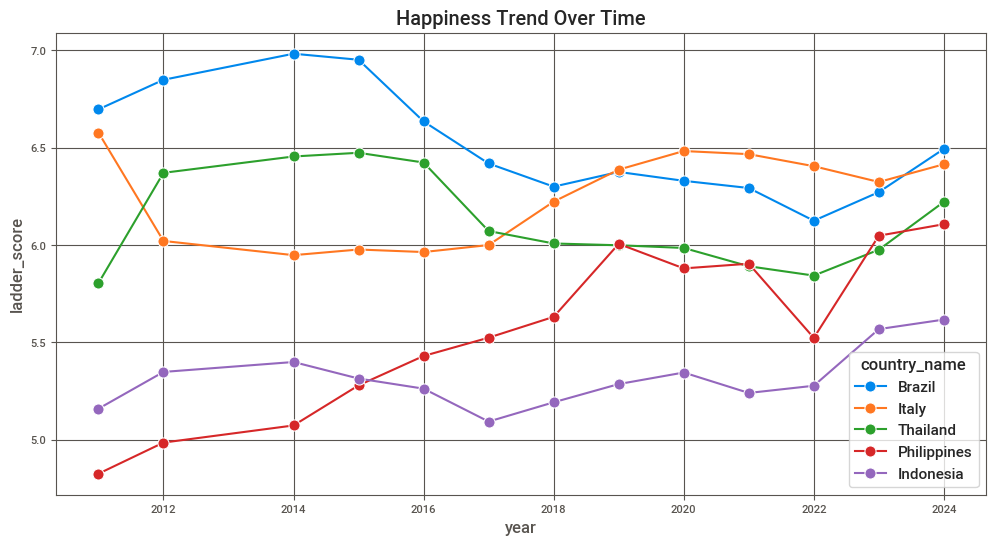

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_trend_by_country(countries):
    plt.figure(figsize=(12, 6))
    data = df[df['country_name'].isin(countries)]
    sns.lineplot(data=data, x='year', y='ladder_score', hue='country_name', marker='o', markersize=8)
    plt.title("Happiness Trend Over Time")
    plt.grid(True)
    plt.show()

# Example
plot_trend_by_country(['Italy', 'Indonesia','Thailand', 'Brazil', 'Philippines'])



From the graph we can see Indonesia is at the lowest among the other Countries
    - indicating the lowest happiness score, eventhen, the score is increasing after a downfall in 2017 which indicates a positive action.
    - all the other 4 Countries are also in their growing phase of happiness between a 6.0 to 6.5 scale with no much big difference.